In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [4]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

from the above array we can see that the target value is "MedHouseVal" on y axis and features are the rest in x axis

In [11]:
housing_df = pd.DataFrame(housing["data"],columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [17]:
housing_df["target"]= housing["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [19]:
# Import algorithm
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create the data
x = housing_df.drop("target",axis=1)
y= housing_df["target"] # median house price in $ 100,00s

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# Instantiate and fit the model (on training set)
model = Ridge()
model.fit(x_train,y_train)

#check the score of the model (on the test set)

model.score(x_test,y_test)


0.5758549611440127

In [23]:
from sklearn.svm import SVR
regr = svm.SVR()
regr.fit(x_train,y_train)
regr.score(x_test,y_test)
#this didn't fit the data correctly

-0.01648536010717372

## lets try ensemble model (an ensemble is a combination of smaller models to try and make better final model)

In [25]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
model = RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8051230593157366

In [28]:
for i in range (10,100,10):
    print(f"n_estimator = {i}")
    model = RandomForestRegressor(n_estimators=i)
    model.fit(x_train,y_train)
    print(f"the score is {model.score(x_test,y_test)}")

n_estimator = 10
the score is 0.7800636239425849
n_estimator = 20
the score is 0.7968420472227158
n_estimator = 30
the score is 0.7975408850161925
n_estimator = 40
the score is 0.8034692771910594
n_estimator = 50
the score is 0.8046700771484727
n_estimator = 60
the score is 0.8019383013901595
n_estimator = 70
the score is 0.8067244615906781
n_estimator = 80
the score is 0.8052655826994104
n_estimator = 90
the score is 0.8072897222017679


In [32]:
a= model.predict(x_test)

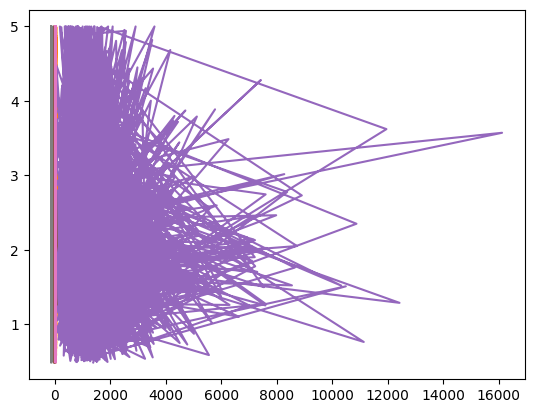

In [34]:
plt.plot(x_test,a);

In [35]:
from sklearn.ensemble import RandomForestRegressor
x = housing_df.drop("target",axis=1)
y= housing_df["target"] # median house price in $ 100,00s

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

np.random.seed(42)
model = RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [36]:
y_preds = model.predict(x_test)

In [38]:
y_preds[:10]

array([1.69194, 1.30722, 1.90559, 2.80103, 1.13624, 2.18324, 0.8795 ,
       2.69441, 1.65341, 1.43519])

In [40]:
np.array(y_test[:10])

C:\Users\HOME\AppData\Local\Temp\ipykernel_17308\25245348.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  np.array(y_test[:10])


array([1.011, 1.208, 1.78 , 3.015, 1.663, 2.717, 0.752, 2.646, 1.586,
       1.313])

In [43]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

0.32531296276647304